In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [2]:
!ls ../data

walmart_ts_6_fcst_grp_test.csv  walmart_ts_6_fcst_grp_train.csv


In [3]:
df_train = pd.read_csv('../data/walmart_ts_6_fcst_grp_train.csv')
df_test = pd.read_csv('../data/walmart_ts_6_fcst_grp_test.csv')
print(df_train.shape, df_test.shape)
df_train.head()

(702, 11) (36, 11)


,Store,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,sample_weight
0,4,4,2010/2/5,59554.57,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1,4,4,2010/2/12,54069.82,-1.0,-1.0,-1.0,-1.0,-1.0,1,5
2,4,4,2010/2/19,53939.17,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
3,4,4,2010/2/26,54687.08,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
4,4,4,2010/3/5,56959.02,-1.0,-1.0,-1.0,-1.0,-1.0,0,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          702 non-null    int64  
 1   Dept           702 non-null    int64  
 2   Date           702 non-null    object 
 3   Weekly_Sales   702 non-null    float64
 4   MarkDown1      702 non-null    float64
 5   MarkDown2      702 non-null    float64
 6   MarkDown3      702 non-null    float64
 7   MarkDown4      702 non-null    float64
 8   MarkDown5      702 non-null    float64
 9   IsHoliday      702 non-null    int64  
 10  sample_weight  702 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 60.5+ KB


In [13]:
#df_train['Date'] = pd.to_datetime(df_train['Date'])
#df_test['Date'] = pd.to_datetime(df_test['Date'])

In [5]:
# 単一のグループIDを作成
df_train['Store_Dept'] = [str(i)+'_'+str(j) for i,j in zip(df_train['Store'], df_train['Dept'])]
df_test['Store_Dept'] = [str(i)+'_'+str(j) for i,j in zip(df_test['Store'], df_test['Dept'])]

In [6]:
#df_train = df_train[['Store_Dept','Date','Weekly_Sales','IsHoliday']]
#df_test = df_test[['Store_Dept','Date','Weekly_Sales','IsHoliday']]
df_train = df_train[['Store_Dept','Date','Weekly_Sales']]
df_test = df_test[['Store_Dept','Date','Weekly_Sales']]
print(df_train.shape, df_test.shape)
df_train.head()

(702, 3) (36, 3)


,Store_Dept,Date,Weekly_Sales
0,4_4,2010/2/5,59554.57
1,4_4,2010/2/12,54069.82
2,4_4,2010/2/19,53939.17
3,4_4,2010/2/26,54687.08
4,4_4,2010/3/5,56959.02


In [7]:
df_train['Store_Dept'].value_counts()

Store_Dept
4_4      117
8_13     117
1_13     117
13_8     117
19_8     117
31_13    117
Name: count, dtype: int64

In [8]:
df_train['Date'].nunique(), df_test['Date'].nunique()

(117, 6)

In [9]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df_train,
    #id_column=['Store', 'Dept'],
    id_column='Store_Dept',
    timestamp_column="Date"
)
train_data.head()

Weekly_Sales
item_id timestamp               
4_4     2010-02-05      59554.57
        2010-02-12      54069.82
        2010-02-19      53939.17
        2010-02-26      54687.08
        2010-03-05      56959.02

In [10]:
%%time

predictor = TimeSeriesPredictor(
    target="Weekly_Sales",
    #known_covariates_names=["IsHoliday"],
    eval_metric="RMSE",
    prediction_length=6,
    path="./tmp",
).fit(
    train_data, presets="bolt_base",
)
predictor

Beginning AutoGluon training...
AutoGluon will save models to '/Users/YShimada-MBP16/Documents/Code_Github/DL_for_ImageData_and_Finetuning/TimeSeries_WM_simple/code/tmp'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:00 PST 2025; root:xnu-11215.81.4~3/RELEASE_X86_64
CPU Count:          16
GPU Count:          0
Memory Avail:       12.85 GB / 32.00 GB (40.2%)
Disk Space Avail:   1436.09 GB / 1863.39 GB (77.1%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 6,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': Tr

CPU times: user 2.99 s, sys: 848 ms, total: 3.84 s
Wall time: 4.9 s


In [11]:
predictor.prediction_length

6

In [17]:
predictions = predictor.predict(train_data)
predictions

# 与えられたデータの最後の日付から、prediction_length分を予測

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]


mean           0.1           0.2           0.3  \
item_id timestamp                                                            
4_4     2012-05-04  58457.667969  54596.765625  55801.671875  56712.921875   
        2012-05-11  59094.867188  55017.210938  56232.050781  57214.839844   
        2012-05-18  59522.289062  55317.265625  56584.996094  57616.019531   
        2012-05-25  59884.371094  55599.445312  56930.289062  57973.109375   
        2012-06-01  60301.242188  55800.687500  57216.703125  58309.281250   
        2012-06-08  59724.187500  55307.351562  56713.015625  57790.410156   
8_13    2012-05-04  24584.298828  22936.460938  23514.357422  23921.964844   
        2012-05-11  24573.091797  22800.037109  23409.107422  23852.595703   
        2012-05-18  24623.982422  22806.966797  23438.673828  23893.103516   
        2012-05-25  24609.269531  22783.496094  23426.009766  23884.355469   
        2012-06-01  24641.873047  22782.935547  23436.654297  23903.726562   
        2012-06-08  24654.166016  22786.335938  23446.931641  23914.947266   
1_13    2012-05-04  40660.468750  38148.261719  39043.625000  39646.757812   
        2012-05-11  40801.937500  38080.742188  39023.921875  39691.996094   
        2012-05-18  40048.816406  37279.648438  38246.855469  38938.906250   
        2012-05-25  40197.464844  37277.195312  38303.375000  39022.078125   
        2012-06-01  41434.429688  38205.195312  39324.738281  40122.296875   
        2012-06-08  41794.644531  38475.359375  39650.953125  40451.875000   
13_8    2012-05-04  35158.121094  33065.687500  33761.683594  34280.539062   
        2012-05-11  35119.320312  32921.242188  33645.949219  34193.187500   
        2012-05-18  35015.089844  32790.777344  33540.175781  34098.332031   
        2012-05-25  34987.808594  32727.343750  33495.675781  34063.171875   
        2012-06-01  34907.308594  32602.337891  33393.570312  33971.941406   
        2012-06-08  34827.671875  32499.386719  33299.054688  33887.519531   
19_8    2012-05-04  41763.679688  39193.328125  40048.335938  40681.218750   
        2012-05-11  41760.894531  39048.132812  39927.871094  40600.640625   
        2012-05-18  41688.566406  38948.796875  39844.804688  40527.828125   
        2012-05-25  41722.265625  38947.960938  39868.320312  40555.625000   
        2012-06-01  41770.781250  38944.285156  39886.101562  40587.375000   
        2012-06-08  41812.421875  38965.375000  39917.917969  40624.347656   
31_13   2012-05-04  43324.082031  40802.539062  41640.300781  42255.679688   
        2012-05-11  43922.718750  41103.277344  41998.816406  42693.449219   
        2012-05-18  44781.820312  41763.222656  42738.914062  43487.273438   
        2012-05-25  44525.191406  41565.949219  42543.367188  43274.996094   
        2012-06-01  44184.402344  41205.601562  42208.621094  42947.445312   
        2012-06-08  44214.035156  41162.542969  42198.878906  42960.218750   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
4_4     2012-05-04  57568.484375  58457.667969  59402.519531  60462.789062   
        2012-05-11  58136.042969  59094.867188  60093.238281  61203.996094   
        2012-05-18  58572.550781  59522.289062  60523.183594  61650.089844   
        2012-05-25  58930.605469  59884.371094  60892.179688  62031.269531   
        2012-06-01  59301.988281  60301.242188  61360.632812  62529.566406   
        2012-06-08  58742.230469  59724.187500  60751.621094  61938.222656   
8_13    2012-05-04  24266.589844  24584.298828  24907.386719  25273.328125   
        2012-05-11  24228.335938  24573.091797  24919.478516  25310.703125   
        2012-05-18  24276.699219  24623.982422  24974.130859  25368.857422   
        2012-05-25  24265.251953  24609.269531  24960.644531  25357.302734   
        2012-06-01  24287.730469  24641.873047  24994.904297  25394.523438   
        2012-06-08  24301.464844  24654.166016  2

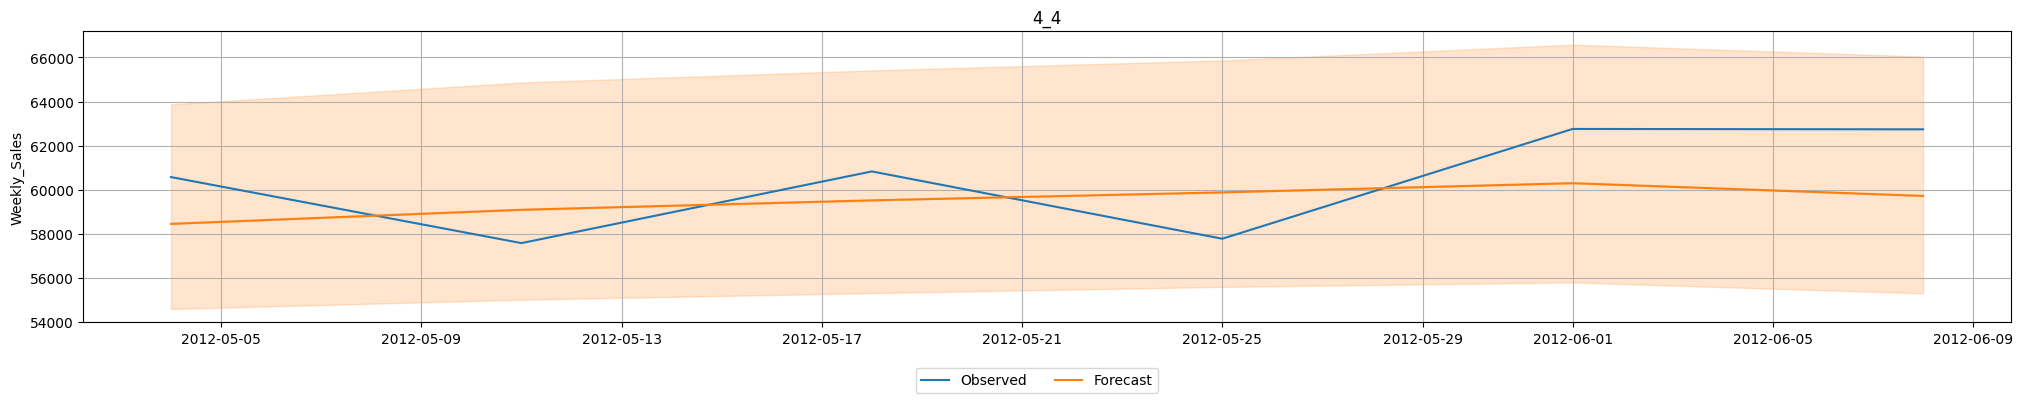

In [20]:
predictor.plot(test_data, predictions ,max_history_length=1000, item_ids=["4_4"])

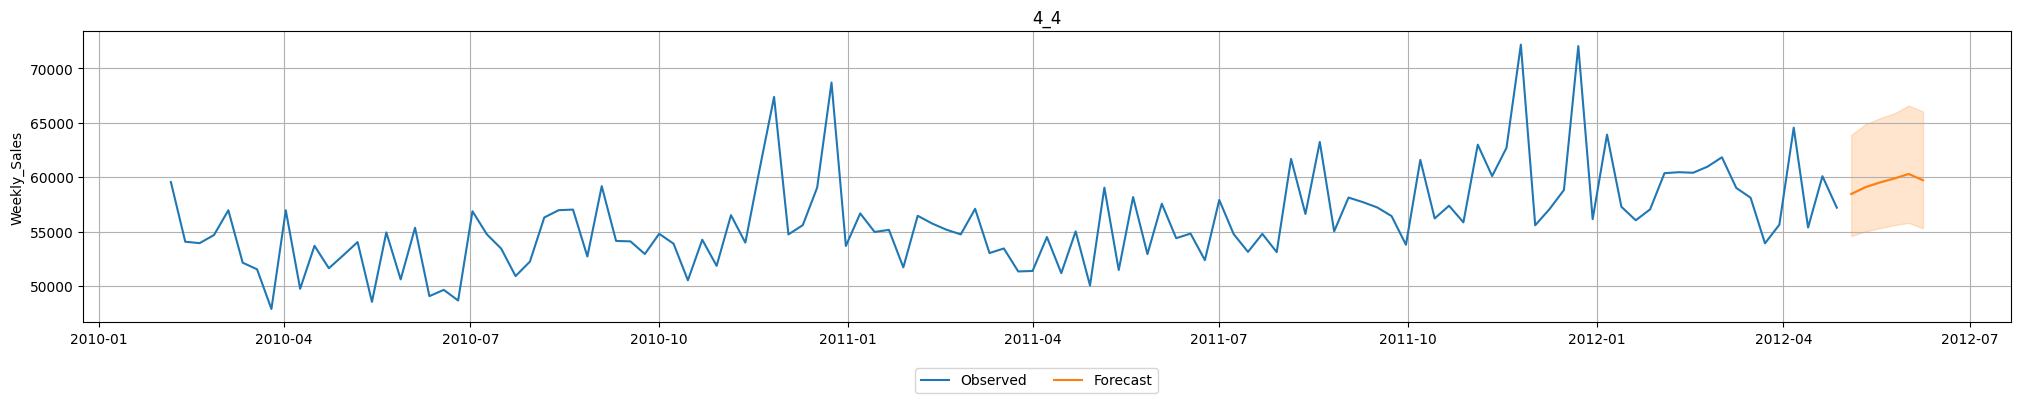

In [21]:
predictor.plot(train_data, predictions ,max_history_length=1000, item_ids=["4_4"])

In [14]:
test_data = TimeSeriesDataFrame.from_data_frame(
    df_test,
    #id_column=['Store', 'Dept'],
    id_column='Store_Dept',
    timestamp_column="Date"
)

predictor.predict(test_data)

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]


mean           0.1           0.2           0.3  \
item_id timestamp                                                            
4_4     2012-06-15  61715.730469  56557.664062  58541.191406  59804.773438   
        2012-06-22  61572.691406  55420.359375  57716.058594  59238.101562   
        2012-06-29  61411.925781  54646.316406  57166.222656  58864.222656   
        2012-07-06  61281.136719  54057.976562  56759.105469  58518.230469   
        2012-07-13  61136.039062  53486.703125  56355.031250  58241.242188   
        2012-07-20  61030.179688  53136.644531  56083.035156  58026.097656   
8_13    2012-06-15  26293.113281  24401.468750  25212.261719  25688.945312   
        2012-06-22  26216.382812  23783.335938  24797.755859  25412.876953   
        2012-06-29  26125.753906  23314.275391  24492.099609  25203.970703   
        2012-07-06  26041.095703  22907.595703  24189.240234  24963.646484   
        2012-07-13  25878.949219  22414.365234  23819.582031  24686.140625   
        2012-07-20  25769.419922  22131.740234  23599.085938  24507.162109   
1_13    2012-06-15  41753.957031  37148.148438  39006.000000  40151.691406   
        2012-06-22  41648.765625  35788.273438  38077.742188  39539.046875   
        2012-06-29  41567.812500  34818.300781  37455.765625  39152.898438   
        2012-07-06  41371.191406  33963.148438  36818.753906  38632.539062   
        2012-07-13  40972.234375  32852.000000  35980.164062  37991.839844   
        2012-07-20  40942.285156  32405.566406  35686.285156  37794.558594   
13_8    2012-06-15  36372.460938  32933.968750  34308.636719  35160.917969   
        2012-06-22  36274.433594  32090.548828  33721.429688  34766.507812   
        2012-06-29  36205.820312  31524.496094  33364.582031  34543.335938   
        2012-07-06  36057.597656  31018.214844  32992.863281  34229.484375   
        2012-07-13  35824.175781  30386.347656  32523.431641  33873.703125   
        2012-07-20  35874.675781  30188.701172  32425.939453  33838.917969   
19_8    2012-06-15  42608.683594  37464.515625  39573.488281  40854.183594   
        2012-06-22  42448.453125  36360.195312  38817.410156  40354.617188   
        2012-06-29  42380.398438  35624.011719  38399.941406  40113.031250   
        2012-07-06  42273.062500  34966.921875  37954.078125  39756.167969   
        2012-07-13  42001.312500  34142.937500  37355.652344  39316.554688   
        2012-07-20  42135.125000  33916.488281  37261.531250  39320.625000   
31_13   2012-06-15  43216.335938  40348.695312  41508.125000  42215.406250   
        2012-06-22  43189.175781  39690.160156  41072.804688  41946.855469   
        2012-06-29  43198.027344  39272.410156  40836.539062  41827.578125   
        2012-07-06  43153.699219  38921.355469  40616.410156  41653.496094   
        2012-07-13  43140.941406  38611.886719  40430.398438  41557.437500   
        2012-07-20  43237.964844  38523.148438  40407.027344  41578.160156   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
4_4     2012-06-15  60807.808594  61715.730469  62650.480469  63806.398438   
        2012-06-22  60480.027344  61572.691406  62703.820312  64106.468750   
        2012-06-29  60213.015625  61411.925781  62695.207031  64314.500000   
        2012-07-06  59952.156250  61281.136719  62702.703125  64544.171875   
        2012-07-13  59745.300781  61136.039062  62694.695312  64652.582031   
        2012-07-20  59570.011719  61030.179688  62681.027344  64872.445312   
8_13    2012-06-15  26023.498047  26293.113281  26548.076172  26863.972656   
        2012-06-22  25862.826172  26216.382812  26554.042969  26961.238281   
        2012-06-29  25717.255859  26125.753906  26531.835938  27023.960938   
        2012-07-06  25545.207031  26041.095703  26519.714844  27110.640625   
        2012-07-13  25332.650391  25878.949219  26439.562500  27092.441406   
        2012-07-20  25183.246094  25769.419922  2